In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
infert=pd.read_csv(r'C:\Users\alyss\Desktop/infert.csv' , on_bad_lines='skip')

In [3]:
infert.head()

,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,0-5yrs,26,6,1,1,2,1,3
1,0-5yrs,42,1,1,1,0,2,1
2,0-5yrs,39,6,2,1,0,3,4
3,0-5yrs,34,4,2,1,0,4,2
4,6-11yrs,35,3,1,1,1,5,32


In [5]:
print("\nMissing Values:")
print(infert.isnull().sum())


Missing Values:
education         0
age               0
parity            0
induced           0
case              0
spontaneous       0
stratum           0
pooled.stratum    0
dtype: int64


In [6]:
print("\nSummary Statistics:")
print(infert.describe())


Summary Statistics:
              age      parity     induced        case  spontaneous  \
count  248.000000  248.000000  248.000000  248.000000   248.000000   
mean    31.504032    2.092742    0.572581    0.334677     0.576613   
std      5.251565    1.251504    0.738457    0.472832     0.732541   
min     21.000000    1.000000    0.000000    0.000000     0.000000   
25%     28.000000    1.000000    0.000000    0.000000     0.000000   
50%     31.000000    2.000000    0.000000    0.000000     0.000000   
75%     35.250000    3.000000    1.000000    1.000000     1.000000   
max     44.000000    6.000000    2.000000    1.000000     2.000000   

          stratum  pooled.stratum  
count  248.000000      248.000000  
mean    41.870968       33.580645  
std     23.968423       17.272100  
min      1.000000        1.000000  
25%     21.000000       19.000000  
50%     42.000000       36.000000  
75%     62.250000       48.250000  
max     83.000000       63.000000  


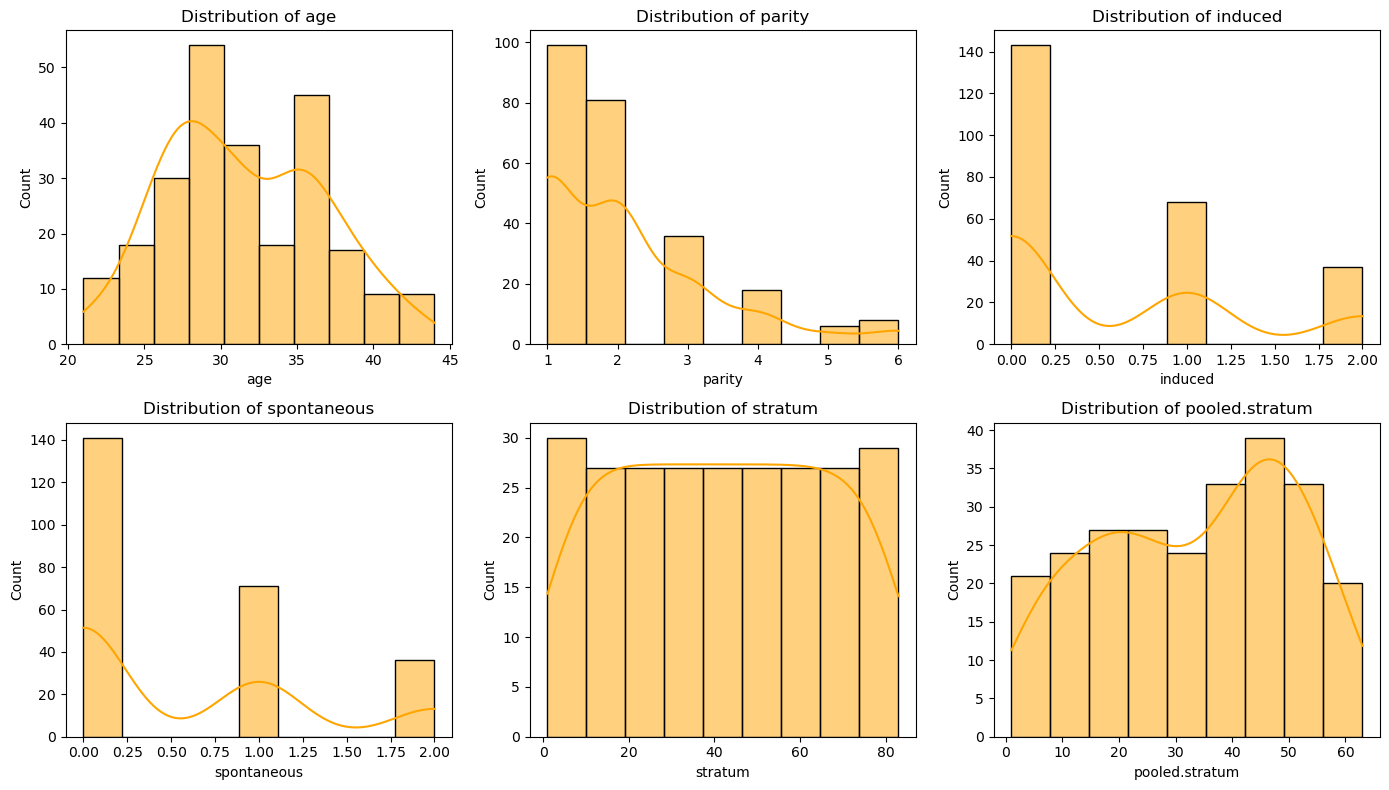

In [7]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(['age', 'parity', 'induced', 'spontaneous', 'stratum', 'pooled.stratum'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(infert[column], kde=True, color='orange')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

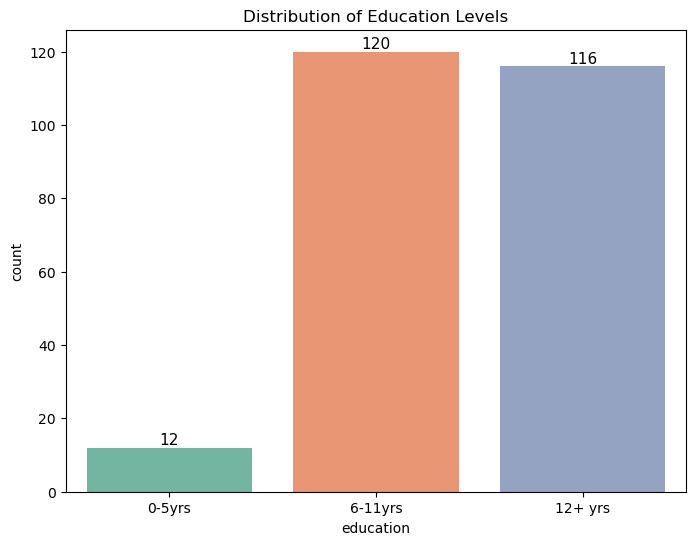

In [12]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='education', data=infert, palette='Set2')
plt.title('Distribution of Education Levels')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=11)
plt.show()

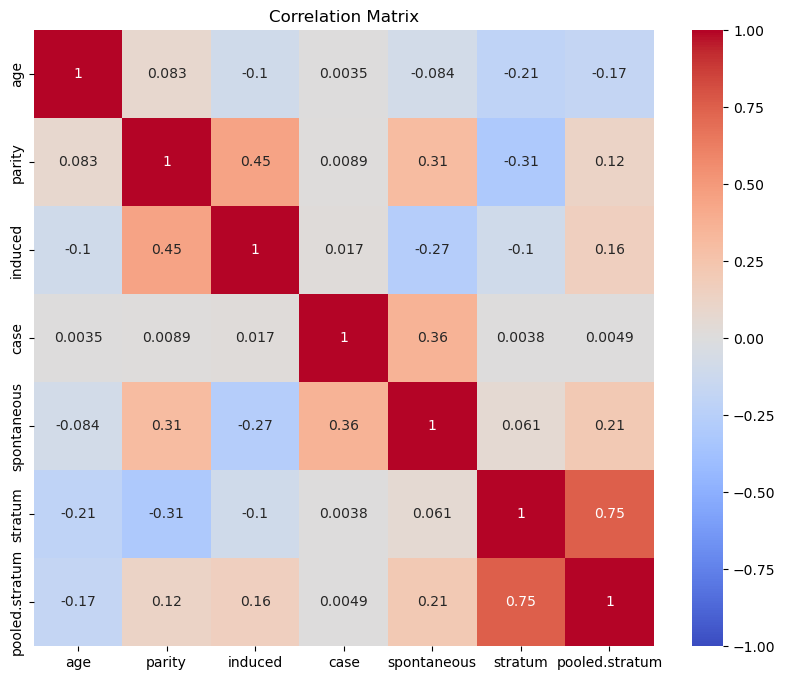

In [14]:
correlation_matrix = infert.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
numeric_data = infert.select_dtypes(include=['number'])

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [18]:
pca = PCA(n_components=len(numeric_data.columns))  
pca_result = pca.fit_transform(scaled_data)

In [19]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio of Each Principal Component:")
print(explained_variance)

Explained Variance Ratio of Each Principal Component:
[0.27246836 0.22512654 0.20133844 0.13345273 0.11835649 0.02980756
 0.01944988]


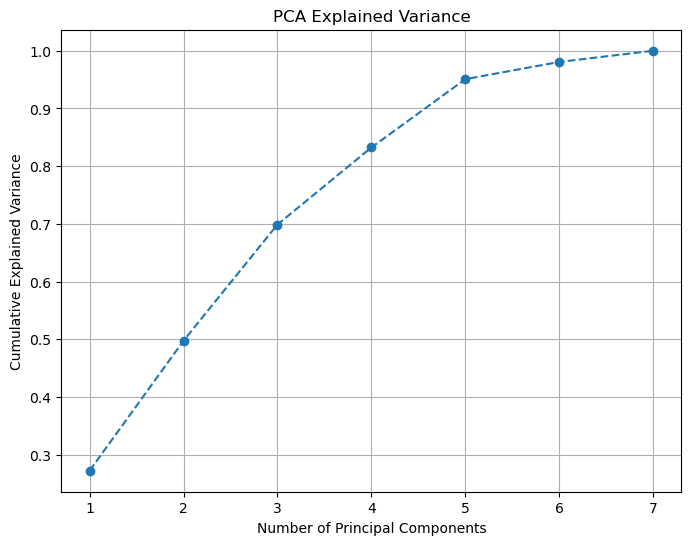

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

In [21]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(len(numeric_data.columns))])
print("\nFirst 5 rows of PCA result:")
print(pca_df.head())


First 5 rows of PCA result:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  1.700019  3.645754  1.553839  1.517806 -0.992897  0.521906  0.955867
1  2.870756 -0.300009  0.797910 -0.204987  2.182263 -0.534467 -0.125351
2  3.062628  3.198430 -0.526355 -0.308742  1.366046  0.971576  0.993752
3  2.647850  2.048200 -0.461730  0.845745  1.476731  0.252429  0.635913
4  1.099605  1.653863  0.899902  0.055811  0.839856 -0.032535 -0.743626


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [27]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(len(numeric_data.columns))])

In [40]:
X = pca_df.iloc[:, :4] 
y = infert['case']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = log_reg.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(classification_rep).transpose()
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report_df)

Model Accuracy: 0.92

Classification Report:
              precision    recall  f1-score  support
0              0.941176  0.941176  0.941176    51.00
1              0.875000  0.875000  0.875000    24.00
accuracy       0.920000  0.920000  0.920000     0.92
macro avg      0.908088  0.908088  0.908088    75.00
weighted avg   0.920000  0.920000  0.920000    75.00
